In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-0.5e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e17]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandX1],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 42.535923 seconds (189.07 M allocations: 38.996 GiB, 10.19% gc time)


3.0

In [4]:
foreach(x->println(Ts[x]," ",Efs[x,1,1,]-Eoff),1:length(Ts))

300.0 -0.09585114523158023
310.0 -0.10068534980520383
320.0 -0.10557585151795035
330.0 -0.11051358756874308
340.0 -0.11548421997170077
350.0 -0.12046505175825306
360.0 -0.1254209415346308
370.0 -0.1302996640502725
380.0 -0.13502813764317523
390.0 -0.13951226434377784
400.0 -0.14364381229728096
410.0 -0.14731591191302318
420.0 -0.15044354381152836
430.0 -0.15298031363198028
440.0 -0.15492366239502697
450.0 -0.1563077629285461
460.0 -0.15718988055982397
470.0 -0.15763687587225306
480.0 -0.157715467782654
490.0 -0.15748673777948596
500.0 -0.15700383686993824
510.0 -0.15631162985985458
520.0 -0.15544731525833821
530.0 -0.1544414286801894
540.0 -0.15331892594354102
550.0 -0.1521001887472293
560.0 -0.15080176404238532
570.0 -0.14943721952906053
580.0 -0.14801767667030852
590.0 -0.1465522816681828
600.0 -0.14504858339838744
610.0 -0.14351283592211583
620.0 -0.1419502405611146
630.0 -0.1403651398406014
640.0 -0.13876117320449666
650.0 -0.13714140238441708
660.0 -0.13550841265616143
670.0 -0.13

In [5]:
plot(Ts,Efs[:,1,1]-Eoff,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

MethodError: MethodError: no method matching -(::Array{Float64,1}, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:397
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  ...

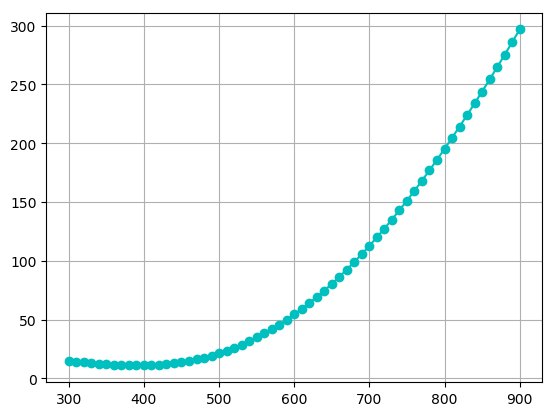

In [6]:
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [7]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

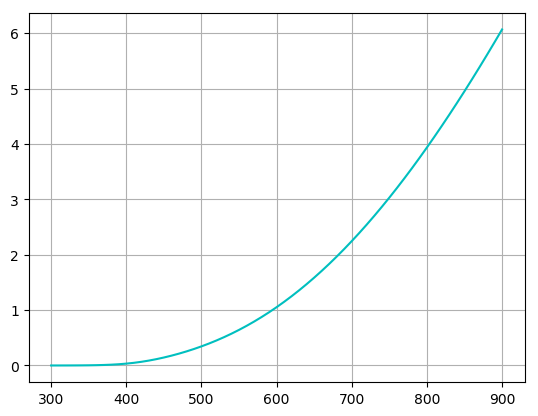

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
#ylim(0,7)
grid()

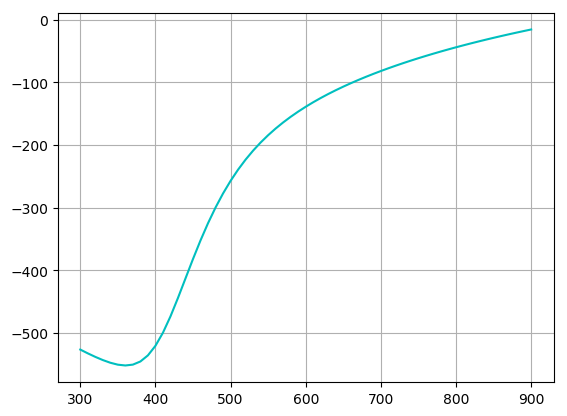

In [9]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
#plot(Ts,seebeckes[:,1,1]*1e6,linestyle="-",color="y")
#plot(Ts,seebeckhs[:,1,1]*1e6,linestyle="-",color="k")
#ylim(-250,-0)
grid()

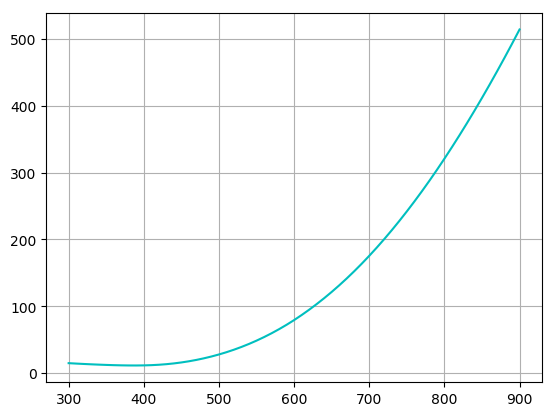

In [10]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
#ylim(0,3500)
grid()

In [11]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [12]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);
#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]  
    thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
    thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
    #println("2")
    tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
    tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22]) 

    tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
    tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

    tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
    tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

    tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
    tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

    tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[21])
    tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[22])

    tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
    tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
    #println("3")

    tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
    tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

    tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
    tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
    tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf

    tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
    tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf#

    tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
    tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
    #println("4")
    tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
    tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    return (vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)
end
xmax=1.0

1.0

In [13]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.6,0.65,0.0)
klsM=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,klsM[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,
        tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(klsM[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [14]:
foreach(x->println(klsM[x,1,1]),1:length(Ts))

0.8545026577017785
0.8377467496493191
0.8216354693391686
0.8061583675339742
0.7913024490622367
0.7770526970046819
0.7633925015153368
0.7503040188712399
0.73776847837693
0.7257664493141096
0.7142780759843655
0.703283284980572
0.6927619652277494
0.6826941197487528
0.6730599897808611
0.6638401549930193
0.6550156149328684
0.6465678557442129
0.6384789043663078
0.6307313712991975
0.6233084827272198
0.6161941028945696
0.6093727477783789
0.6028295911800599
0.5965504643626789
0.590521850276939
0.5847308731671442
0.5791652848805423
0.5738134481128392
0.5686643175210715
0.5637074192128845
0.5589328290943728
0.55433115048404
0.5498934913341159
0.5456114413420893
0.541477049184245
0.537482800058706
0.5336215936872798
0.5298867228927174
0.5262718528401655
0.5227710010080938
0.5193785179342642
0.5160890687658776
0.5128976156294961
0.5097994008252295
0.5067899308407143
0.5038649611732322
0.5010204819426869
0.498252704273797
0.4955580474226167
0.4929331266201222
0.49037474160401223
0.4878798658088655
0

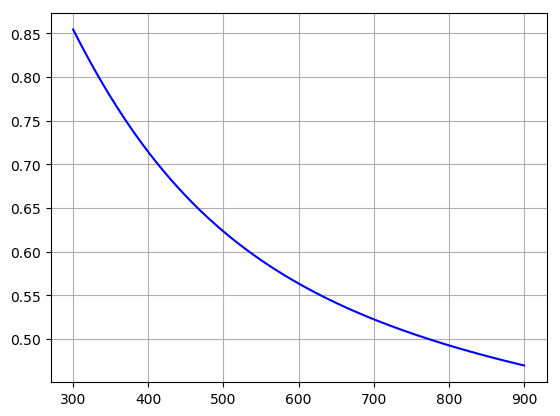

In [15]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
grid()

In [16]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.0,0.65,0.0)
kls0=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls0[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(kls0[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [17]:
foreach(x->println(kls0[x,1,1]),1:length(Ts))

5.762329383899217
5.616727786052704
5.476753827223397
5.34223957645391
5.212998781192882
5.088834079729603
4.969542415601559
4.854919074341342
4.744760666262588
4.638867305932654
4.537044181783284
4.439102661187747
4.3448610347170185
4.2541449725947595
4.166787751862603
4.082630309537761
4.00152117281828
3.923316306752522
3.847878907054273
3.775079156026371
3.7047939538340864
3.6369066342312437
3.571306671888266
3.5078893869947816
3.4465556516480764
3.387211601378471
3.329768353371101
3.274141735688065
3.2202520259257845
3.168023701508703
3.117385201740683
3.0682687017603576
3.0206098983459673
2.9743478073664953
2.9294245725680383
2.885785285308401
2.8433778148017517
2.8021526484032564
2.762062741446432
2.7230633761399403
2.6851120290329593
2.648168246567014
2.612193528245255
2.5771512169666564
2.5430063960910725
2.509725792821009
2.4772776875065587
2.4456318285007685
2.4147593522134283
2.3846327080316634
2.355225587795415
2.3265128595350384
2.298470505196467
2.2710755620968324
2.24430

In [18]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(1.0,0.5,0.0)
kls1=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls1[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
   # println("T=", iTx, " kl= " ,round(kls1[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [19]:
foreach(x->println(kls1[x,1,1]),1:length(Ts))

3.3266330398488324
3.274482216349753
3.2236583514870563
3.1741455208873397
3.125921961560756
3.0789616180447408
3.033235348567812
2.988711866573461
2.9453584763380456
2.903141649245677
2.862027477641971
2.8219820340005968
2.7829716535880653
2.7449631511329398
2.7079239795633647
2.671822340998908
2.636627262022151
2.6023086438382976
2.56883729459689
2.5361849482475907
2.5043242726548254
2.473228868960149
2.442873263849282
2.4132328961674454
2.384284099181001
2.3560040795364805
2.3283708931969698
2.3013634206580007
2.2749613403208424
2.2491451013734167
2.22389589638006
2.199195633877985
2.1750269112134766
2.1513729877982963
2.1282177589238764
2.1055457302362406
2.0833419929465418
2.061592199829436
2.0402825420434176
2.019399726792586
1.998930955837803
1.9788639048559808
1.9591867036390465
1.9398879171185595
1.9209565271976734
1.9023819153689496
1.8841538460941525
1.8662624509206118
1.8486982133075918
1.8314519541355663
1.8145148178710402
1.7978782593596387
1.781534031220433
1.76547417181

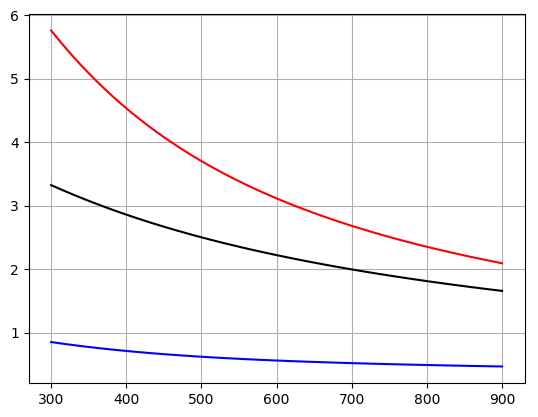

In [20]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")

plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [21]:
yaa=0.6
aMgSi=6.39e-10
aMgSn=6.77e-10

6.77e-10

In [22]:
ks=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klsT=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.0
for (iT,iTx) in enumerate(Ts)  
    klsT[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       ks[iT,1,1]=klsT[iT,1,1]+kes[iT,1,1]+kbis[iT,1,1,] 
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [23]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

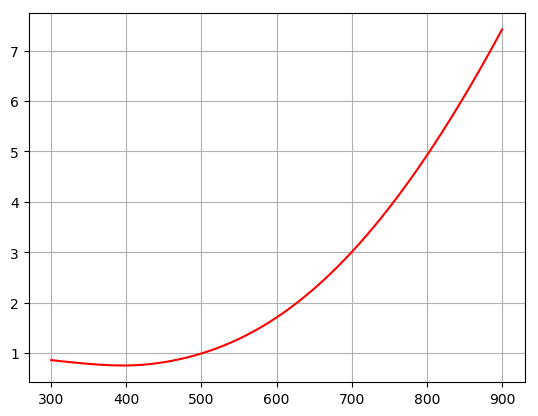

In [24]:
figure()
#semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
#plot(Ts,kls0[:,1,1],linestyle="-",color="b")
#plot(Ts,kls1[:,1,1],linestyle="-",color="c")
#plot(Ts,klsM[:,1,1],linestyle="-",color="k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#ylim(0,4.5)
grid(true)
#kes,kees,kehs,kbis

In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [26]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

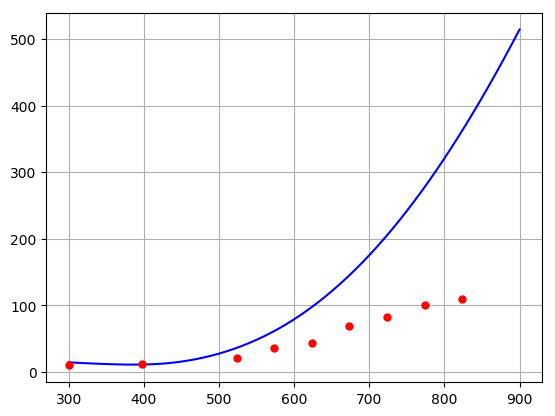

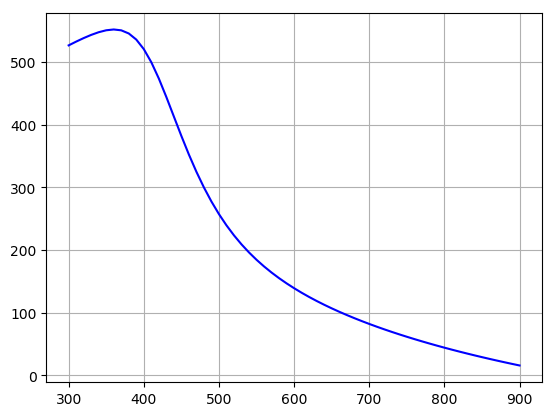

In [27]:

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

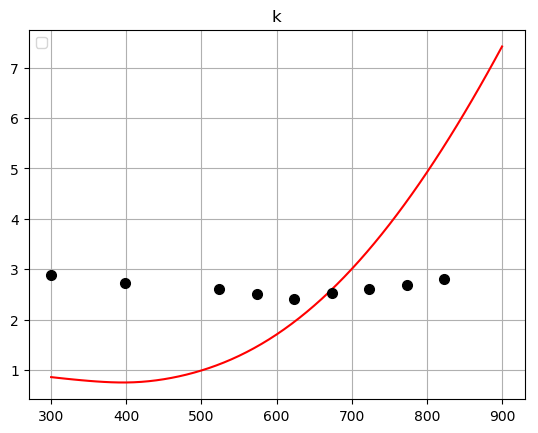

No handles with labels found to put in legend.


In [28]:
figure()
title("k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
#plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
#plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
#plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
#plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
#plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="4 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
#ylim(1.5,5.0)
grid()

In [29]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [36]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

0.8545026577017785
0.8377467496493191
0.8216354693391686
0.8061583675339742
0.7913024490622367
0.7770526970046819
0.7633925015153368
0.7503040188712399
0.73776847837693
0.7257664493141096
0.7142780759843655
0.703283284980572
0.6927619652277494
0.6826941197487528
0.6730599897808611
0.6638401549930193
0.6550156149328684
0.6465678557442129
0.6384789043663078
0.6307313712991975
0.6233084827272198
0.6161941028945696
0.6093727477783789
0.6028295911800599
0.5965504643626789
0.590521850276939
0.5847308731671442
0.5791652848805423
0.5738134481128392
0.5686643175210715
0.5637074192128845
0.5589328290943728
0.55433115048404
0.5498934913341159
0.5456114413420893
0.541477049184245
0.537482800058706
0.5336215936872798
0.5298867228927174
0.5262718528401655
0.5227710010080938
0.5193785179342642
0.5160890687658776
0.5128976156294961
0.5097994008252295
0.5067899308407143
0.5038649611732322
0.5010204819426869
0.498252704273797
0.4955580474226167
0.4929331266201222
0.49037474160401223
0.4878798658088655
0

In [37]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.007615984492965979
0.007593448543783777
0.007563493116480593
0.007529405441543413
0.00749589159639535
0.007469989004021707
0.007462277039394108
0.0074883076864942725
0.007569985575211365
0.007736363038581268
0.008023154824448047
0.008470552712773215
0.0091292310353857
0.010030561884071379
0.011207133348638217
0.01269097755389751
0.014510514889844742
0.016692833888193356
0.01926498409915707
0.02225470574619068
0.025690743597038934
0.029602899633160984
0.03402194498051142
0.038979468251126886
0.044507698898402226
0.05063933001419041
0.05740740839137859
0.06484513743947018
0.07298576906047033
0.08186249174687454
0.09150833219734172
0.10205964095078901
0.11339160976488516
0.12557181707548437
0.13864150874711179
0.15263496895126671
0.1675842986611623
0.1835203798583359
0.20047317529564945
0.21847183979220852
0.23754476423859194
0.2577195924931006
0.27902322687268133
0.301481829082737
0.3251208197866562
0.3499648783688889
0.3760379436457031
0.40336321586719426
0.43196316013646174
0.4618595

In [38]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

0.00014181565309533933
0.0002878446435925512
0.0005604778462693122
0.0010505078836642798
0.0019005003738655935
0.0033254085146774554
0.005634682359633944
0.009249141244947192
0.014699866117419674
0.022592232937289184
0.03352504953429588
0.04798095154906235
0.06627266867438701
0.08844445704950053
0.11439461112543618
0.1439850556578633
0.1771062059772492
0.2137159242418569
0.25384119370793423
0.2975626396942841
0.34499563783200393
0.39627431248688216
0.451539966003073
0.5109334239585716
0.5745903260338411
0.6426383817052024
0.715195060006089
0.7923675053606473
0.8742518755533125
0.9609332277977196
1.0524855781740048
1.1492899741488383
1.2509006034036303
1.3574775320016288
1.469085738041568
1.5857590888382085
1.7075164516201875
1.8343654223228707
1.9663038490568905
2.103320712822641
2.2453967682508256
2.3925050791302898
2.5446115015988915
2.701675137947114
2.8636487715903027
3.0304792881425824
3.2021080848104315
3.37847146895761
3.5595010459974716
3.745124096422907
3.935438893120696
4.130

In [30]:
foreach(x->println(ks[x,1,1]),1:length(Ts))

0.8622604578478398
0.8456280428366953
0.8297594403019186
0.8147382808591819
0.8006988410324976
0.7878480945233811
0.7764894609143648
0.7670414678026813
0.7600383300695611
0.7560950452899801
0.7558262803431095
0.7597347892424076
0.768163864937522
0.7811691386823247
0.7986617342549355
0.82051618820478
0.8466323357999623
0.8769766138742632
0.9115850821733992
0.9505487167396723
0.9939948641562627
1.0420713150146126
1.0949346587619633
1.1527424833897584
1.2156484892949222
1.2837995619963318
1.3573333415646118
1.4363779276806596
1.5210510927266219
1.6114600370656658
1.707701329584231
1.8102824441940002
1.9186233636525554
2.032942840411229
2.153338688130769
2.27987110697372
2.412583550340056
2.5515073958684864
2.6966637472452573
2.8480644054550153
3.0057125334975114
3.1696031895576544
3.3397237972374505
3.516054582659347
3.6985689922021883
3.8872340973521857
4.082010989629367
4.282855166767491
4.48971691040773
4.702541655097763
4.921542409282706
5.146208183381413
5.3766071471504855
5.61268933

In [39]:
foreach(x->println(sigmas[x,1,1]/100),1:length(Ts))

14.773546144407263
14.154693738017839
13.58150233717014
13.054040659539499
12.574976490102049
12.150539076814415
11.791687872056348
11.515310465985813
11.345047842761403
11.311102100976555
11.44836640972451
11.792781021088112
12.388446092369271
13.250980000846146
14.396084399680595
15.837587139730477
17.58461690058882
19.64476228250089
22.025632582055707
24.735570529111097
27.78383489501901
31.180503467065297
34.936259435426585
39.0621507754845
43.569359553816795
48.468999788454184
53.77200847788066
59.4889586715888
65.62997841859021
72.20467242692945
79.22206248926497
86.75531147366586
94.71186937091753
103.12222572701415
111.99914162125965
121.35044743362596
131.18217747362357
141.49923573979876
152.30562730932772
163.6045653681232
175.39853325050447
187.68932786956518
200.4780948271904
213.7653596501905
227.55105719581
241.83456018785535
256.6147073243602
271.8898311361102
287.6577856406965
303.91597376741214
320.70700375485865
337.9523929121947
355.67106336092155
373.86227884994537

In [32]:
foreach(x->println(-seebecks[x,1,1]*1e6),1:length(Ts))

526.7117583833439
532.7228455921006
538.3509635463524
543.4394214504267
547.7294391656883
550.8142443326446
552.0909652726531
550.7319328614321
545.7178784531552
535.989697369928
520.7474432654917
499.8216310311747
473.8131143899655
444.31447046865924
413.1928592172938
382.16012825677495
352.50442683834143
325.0014754892237
299.99167158601267
277.5134643835089
257.4274317042332
239.50739302860526
223.49837810134932
209.1494890005279
196.23016460525534
184.5365627825087
173.89347171011622
164.15154149705722
155.18479853251648
146.8874560978567
139.17083567301222
131.93779279088022
125.16365194794969
118.78602001277828
112.75766825090304
107.03997498823426
101.60045024846916
96.41148013387418
91.44943541607576
86.69398068033078
82.1275221627806
77.73476026040993
73.50232399331762
69.41847076729356
65.47283867586471
61.65624134149795
57.96049735988115
54.37828800153597
50.90303806933573
47.52881579393298
44.2457596164982
41.05667762728683
37.95467501750891
34.93526447527239
31.99453340617

In [33]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.007615984492965979
0.007593448543783777
0.007563493116480593
0.007529405441543413
0.00749589159639535
0.007469989004021707
0.007462277039394108
0.0074883076864942725
0.007569985575211365
0.007736363038581268
0.008023154824448047
0.008470552712773215
0.0091292310353857
0.010030561884071379
0.011207133348638217
0.01269097755389751
0.014510514889844742
0.016692833888193356
0.01926498409915707
0.02225470574619068
0.025690743597038934
0.029602899633160984
0.03402194498051142
0.038979468251126886
0.044507698898402226
0.05063933001419041
0.05740740839137859
0.06484513743947018
0.07298576906047033
0.08186249174687454
0.09150833219734172
0.10205964095078901
0.11339160976488516
0.12557181707548437
0.13864150874711179
0.15263496895126671
0.1675842986611623
0.1835203798583359
0.20047317529564945
0.21847183979220852
0.23754476423859194
0.2577195924931006
0.27902322687268133
0.301481829082737
0.3251208197866562
0.3499648783688889
0.3760379436457031
0.40336321586719426
0.43196316013646174
0.4618595

In [34]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

0.00014181565309533933
0.0002878446435925512
0.0005604778462693122
0.0010505078836642798
0.0019005003738655935
0.0033254085146774554
0.005634682359633944
0.009249141244947192
0.014699866117419674
0.022592232937289184
0.03352504953429588
0.04798095154906235
0.06627266867438701
0.08844445704950053
0.11439461112543618
0.1439850556578633
0.1771062059772492
0.2137159242418569
0.25384119370793423
0.2975626396942841
0.34499563783200393
0.39627431248688216
0.451539966003073
0.5109334239585716
0.5745903260338411
0.6426383817052024
0.715195060006089
0.7923675053606473
0.8742518755533125
0.9609332277977196
1.0524855781740048
1.1492899741488383
1.2509006034036303
1.3574775320016288
1.469085738041568
1.5857590888382085
1.7075164516201875
1.8343654223228707
1.9663038490568905
2.103320712822641
2.2453967682508256
2.3925050791302898
2.5446115015988915
2.701675137947114
2.8636487715903027
3.0304792881425824
3.2021080848104315
3.37847146895761
3.5595010459974716
3.745124096422907
3.935438893120696
4.130

In [35]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

0.8545026577017785
0.8377467496493191
0.8216354693391686
0.8061583675339742
0.7913024490622367
0.7770526970046819
0.7633925015153368
0.7503040188712399
0.73776847837693
0.7257664493141096
0.7142780759843655
0.703283284980572
0.6927619652277494
0.6826941197487528
0.6730599897808611
0.6638401549930193
0.6550156149328684
0.6465678557442129
0.6384789043663078
0.6307313712991975
0.6233084827272198
0.6161941028945696
0.6093727477783789
0.6028295911800599
0.5965504643626789
0.590521850276939
0.5847308731671442
0.5791652848805423
0.5738134481128392
0.5686643175210715
0.5637074192128845
0.5589328290943728
0.55433115048404
0.5498934913341159
0.5456114413420893
0.541477049184245
0.537482800058706
0.5336215936872798
0.5298867228927174
0.5262718528401655
0.5227710010080938
0.5193785179342642
0.5160890687658776
0.5128976156294961
0.5097994008252295
0.5067899308407143
0.5038649611732322
0.5010204819426869
0.498252704273797
0.4955580474226167
0.4929331266201222
0.49037474160401223
0.4878798658088655
0